# Qt Installation and Basic GUI Development

We are transitioning this week, from the implementation of a functional library to the use of that library within a GUI.  Many of your developers collegues are going to be most interested in the work you have done up until this point in the course.  Think about the functionality that you are able to provide to someone else, as an importable library, that they can simply use.  Additionally, think about all of the testing that you have done to give them (and you) confidence in the validity of the code.  That is the power of developing and deploying a library.

For the vast majority of our non-developer collegues, a library is simply a hard to use tool that might do what they need, if only it was more user friendly.  For these users a Graphical User Interface (GUI) is much more approachable.  Over the next four weeks we will step through the creation of a GUI using the [Qt GUI library](http://www.qt.io).  This GUI will be a super simple (simple not that development is easy, but compared to say ArcMap, the feature set is quite small) Geographic Information System (GIS) that can be used to apply point pattern analysis methods that you have already developed.

## Qt
<img src="images/Qt-logo-medium.png" /img>

Qt is a cross platform User Interface (UI) library.  Qt works not only on the big three operating systems (Windows, OSX, Linux), but also on many mobile platforms (iOS, Android).  One of the key pros to Qt is the ability to offer cross platform support with little (or no) modification to the UI code.  That is, your GUI will run on windows and OSX without changes to the code base.  Additionally, the GUI will looks and behave the same (with the caveat that windows and window functionality mimics the OS you are on).

### PyQt
The Qt library is written in C++.  We definitely do not want to have to develop an analytical code base in Python and a GUI in C++ (the interaction between the languages is tractable, but well outside the scope of this text).  Thankfully, Anaconda Python (should) ship with the [PyQt](https://riverbankcomputing.com/software/pyqt/intro) library.  One of the first things that you should do this week is confirm that PyQt is installed.  To do this, launch an iPython notebook or an interactive session (`ipython` in the terminal) and run:

In [4]:
from PyQt4 import QtGui
print(dir(QtGui)[:5])  # Print the first 5 elements in the QtGui namespace

['QAbstractButton', 'QAbstractGraphicsShapeItem', 'QAbstractItemDelegate', 'QAbstractItemView', 'QAbstractPrintDialog']


The above should have output similar to what is shown.  If not, try executing (in a terminal) `conda install pyqt`.  If this does not work, definitely post in the forums as soon as possible.

##PyQt Tutorial
For this week's additional readings, I would like for you to checkout two additional readings:
1. http://zetcode.com/gui/pyqt4/firstprograms/
2. http://zetcode.com/gui/pyqt4/menusandtoolbars/

These are two step by step tutorials that will allow you to complete the GUI portion of the assignment.  Because the code is basically provided for you, please take some time understanding what exactly is happening and how.  As with the previous assignments, we will be building on existing functionality in subsequent weeks.

## Folium <img src="images/folium_logo.jpg" /img>
[Folium](https://folium.readthedocs.org/en/latest/) is a Python library that allows you to rapidly build [leaflet.js](http://leafletjs.com) driven dynamic web maps.  We will use folium to provide the basic mapping infrastructure within our GUI.  This  week, usage of folium is going to be super light.  To get folium installed:

`conda install folium`

(That should have failed...so what is going on?)

Above we see that the conda package manager does not have `folium`.  So, we will fall back to using the general release available via PyPi.  Execute:

`pip install folium`.

(That should work....if not post in the forums ASAP).

To test your Folium installation:

In [7]:
import folium
map_osm = folium.Map(location=[45.5236, -122.6750])
map_osm

Something to try this week - Can you get the map to center on Phoenix at some reasonable zoom level?  How about changing from OSM to another map provider?  Give that a try in an iPython notebook - you can copy/paste the above code.

Note: You need an internet connect to get the maps to display.

## MatPlotLib
[MatPlotLib](http://matplotlib.org) is arguably *the* Python plotting library.  For publication ready figures, this is a plotting package that I most frequently utilize as it offers a clean API, powerful plotting functionality, and rapid development.  The package does show it's age, especially when compared to some of the newer interactive plotting libraries (D3.js being a prime example).  Having said that, MatPlotLib is the tool that we will focus on for rapidly creating figures.

Checkout [J.R. Johansson's](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) wonderful MatPlotLib tutorial (through at least cell #49).  This tutorials demonstrates how you can accomplish the two plotting deliverables for this week.

## Monkey Patching
As a brief aside, I want to take a minute to offer an example of [Monkey Patching](https://filippo.io/instance-monkey-patching-in-python/).  This is one way that you could get the plotting deliverable patched in to your point pattern class.  

Imagine that you have a class `Foo`:

In [10]:
import numpy as np
class Foo(object):
    def __init__(self, x_vector, y_vector):
        self.x = x_vector
        self.y = y_vector
pts = np.random.uniform(-1, 1, (10,2))
foo = Foo(pts[:,0], pts[:,1])

print('X values: {}'.format(foo.x))

X values: [ 0.73990475  0.37594379 -0.28570159  0.69986564 -0.56593876 -0.58446385
  0.22086394  0.8831886   0.51762055  0.84343588]


Image too that we have a file called `mpl_views.py` that contains the following function:

Populating the interactive namespace from numpy and matplotlib


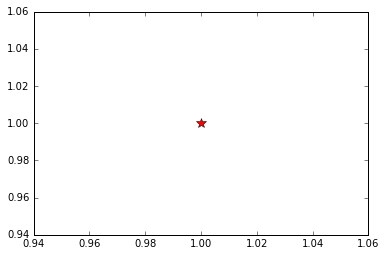

In [17]:
# Added for this notebook
%pylab inline 

# The function
def plot_points(x, y, **kwargs):
    """
    x : numeric or iterable
        x coordinates to plot
    y : numeric or iterable
        y coordiantes to plot
    kwargs : dict
             Any matplotlib accepted keyword arguments (see MPL documentation)
    """
    plot(x,y, **kwargs)
    
plot_points(1,1, color='red', marker='*', markersize=10)

And we want to add the plotting capability to Foo, but do it dynamically, say within an iPython notebook

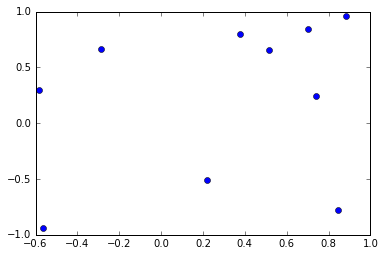

In [19]:
foo.plot_points = plot_points
foo.plot_points(foo.x, foo.y, marker='o', linewidth=0)

This might not be the best example of monkey patching (because we are still passing attributes), but you should have the general idea - we have added a method to a class at runtime, without modifying the original class.  If we created another instance of `Foo`, say `foo2`, this class would not have the plotting method, unless we patched it in.

# Week 12 Deliverables (E8) - Due 4/12/16
For this week make sure that you have completed the following:
    
* Fork Assignment 9 to your own github repository.
    * You can access assignment 9 [HERE](https://github.com/Geospatial-Python/assignment_09)
* Clone the repository locally

## Deliverables
1. Create a GUI application that can be launched from a script named `view.py`.  The GUI should include:
    * A single window (QMainWindow or QWidget)
    * A `File` menu with at least one entry - `Quit`.  The quit item should exit the program.
    * The code should be presented using the following conventions:
        a. Include an `if '__name__' == __main__:` block
        b. Write your GUI in a class, inhereting from QMainWindow, QWidget, or another appropriate parent.  You should have at least an `__init__` method and a `init_ui` method.
        c. Call a function called `main` when the application is launched and an instance of your GUI class is created
    * A central widget.  This can be an empty widget, a text box, a graphic - we will replace this next week with something else, so the important part for now is having something in the window.
    
    Note: For the above requirements, the linked readings offer step-by-step examples of how to achieve this.
1. If you wrote a script for last week demonstrating your point pattern analysis code, please move that code into an iPython notebook.  Extend the notebook to:
    * Plot the point pattern.  To do this, please write a function that takes two vectors (x, y) as arguments and then generates a plot.  
    * Plot the results of the G-function.  You can see an example of this in a previous week's readings.  In addition to plotting the observed function, plot the upper and lower confidence thresholds in a different line color.  For example, if the observed value is red, then the upper and lower thresholds (with p=0.05 maybe) could be blue.
    
    Hint: To get plots to automatically display in a notebook add `%pylab inline` to the first cell (where your other imports are)
1. Update any other support code as necessary.